## Understanding the fast fourier transform

In [172]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,6)

## let us create a simple dataset 

We make a sum of 2 sine waves of 2 frequencies and add some noise to it 

In [173]:
dt = 0.001
t = np.arange(0,1,dt)

freq_1 = 50
freq_2 =20

f = np.sin(2*np.pi * freq_1*t)   + np.sin(2*np.pi*freq_2*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t)) ## adding some noise 

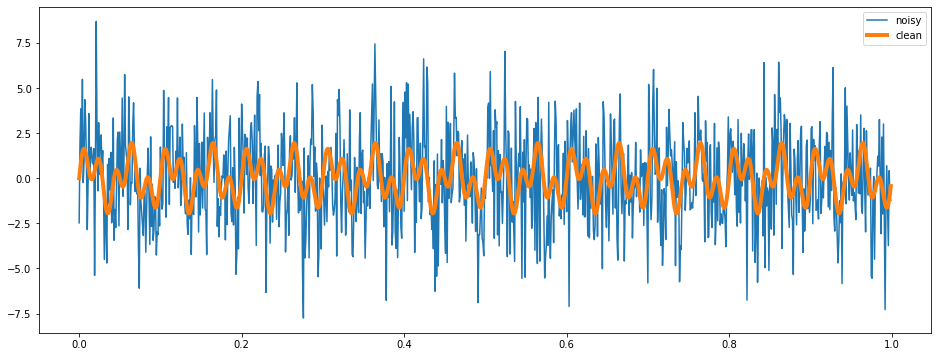

In [174]:
plt.plot(t,f, label = "noisy")
plt.plot(t,f_clean, label = "clean", linewidth = 4)
plt.legend()

## Computing the FFT and extracting the important frequencies 

The `fft` gives us the vector containing the magnitude of the sine and cosine components that we have to add up to get back the dataset

We'll see below how the `fft` helped us determine how much each of the frequencies "matter" when building up our noisy function. 

It's clear that there are 2 frequencies that are super important, so we threshold the power values and try to extract those 2 important frequencies

/home/mayukh/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


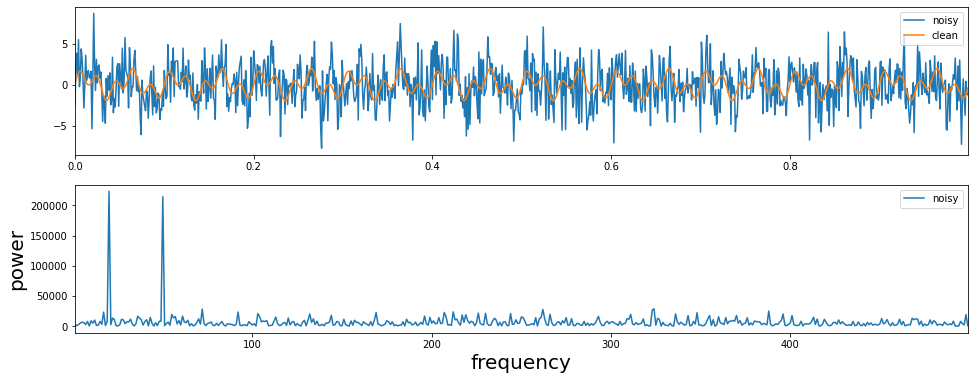

In [185]:
n = len(t)
fhat = np.fft.fft(f,n)  # compute FFT 
PSD = fhat*np.conj(fhat)  ## power spectrum 

freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2), dtype = 'int')

fig, axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t, f, label = "noisy")
plt.plot(t, f_clean, label = "clean")
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
axs.flat[1].set_xlabel("frequency", fontsize = 20)
axs.flat[1].set_ylabel("power", fontsize = 20)

plt.plot(freq[L], PSD[L], label = 'noisy')
plt.xlim(freq[L[0]], freq[L[-1]])

plt.legend()

## Extracting the component frequencies with thresholding

We zero out all of the values which are below our threshold 

In [158]:
indices = PSD>2e5
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)  

## Visualizing the recovered data 

/home/mayukh/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


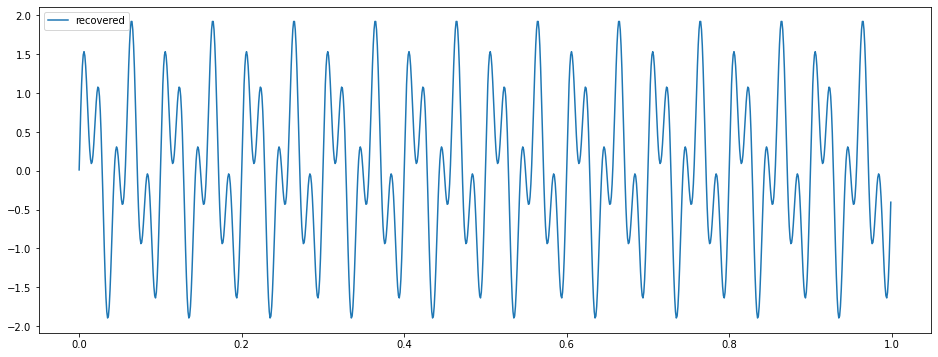

In [159]:
plt.plot(t, ffilt, label = "recovered")
plt.legend()

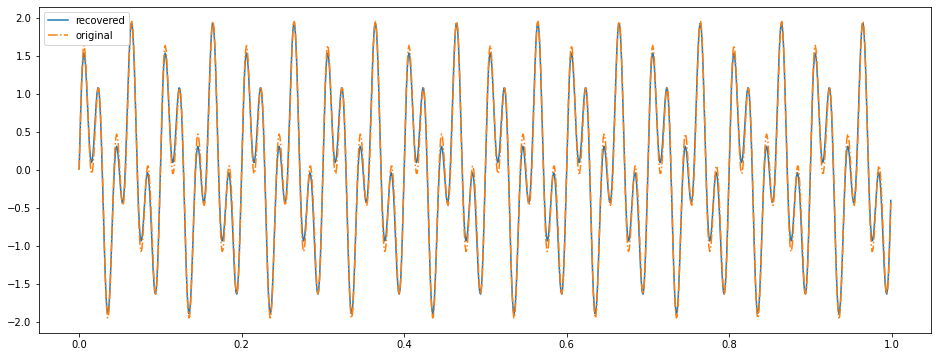

In [168]:
plt.plot(t, np.real(ffilt), label = "recovered")
plt.plot(t, f_clean, linestyle = "-.", label = "original")
plt.legend()